## PARCEIROS 360

###  Pagamento - Utilização Factoring & Bloqueios

- <b>Analista(s)</b>: Victor Hugo
- <b>Projeto</b>: Parceiros 360 - Um modelo de análise de risco para auxiliar no controle das tomadas de decisões através de análises preditivas
- <b>Data</b>: 24/10/2022
- <b>Descrição</b>: Junção (JOIN) entre as bases pré-processadas utilizando como chave: 'RAIZ_CNPJ' e 'COMPETENCIA'. Tem um caso especial (o primeiro JOIN) que é feito entre uma base com o cadastro de fornecedores que utiliza como chave a coluna 'FORNECEDOR'. A partir desse primeiro relacionamento, conseguimos a chave 'RAIZ_CNPJ'.

In [1]:
!python --version

Python 3.8.12


### BIBLIOTECAS:

In [2]:
## data
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
from unicodedata import normalize

## vis
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## modelo
from sklearn import preprocessing

## alertas
import warnings
warnings.filterwarnings("ignore")

### LAYOUT:

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

rc={'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16,
    'axes.titlesize': 18, 'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(rc=rc)
sns.set_style("darkgrid")
sns.set_palette("pastel")

### CONFIGS:

In [4]:
#pd.set_option('max_columns', 200)
pd.options.display.max_columns = 200 

seed = 42
np.random.seed(seed)

### DADOS:

In [5]:
PATH = "datasets/"

#### ALIADOS:

In [138]:
FILE = "02_ALIADOS.csv"
aliados = pd.read_csv(PATH + FILE, sep = ';', encoding = 'ISO-8859-1', engine ='python')
aliados.tail()

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
25786,2022-07-01,96662168,DREBES E CIA LTDA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
25787,2022-07-01,98102924,DELTASUL UTILIDADES LTDA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
25788,2022-07-01,B8677373,"NETMETRIX SOLUTIONS, S.L.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
25789,2022-07-01,B9898262,"KENMEI TECHNOLOGIES, S.L.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
25790,2022-07-01,ESB60217,ITP TECNOLOGICA SL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [139]:
aliados['RAIZ_CNPJ'] = aliados['RAIZ_CNPJ'].apply(lambda x: str(x).zfill(8))

In [140]:
aliados['COMPETENCIA'] = pd.to_datetime(aliados['COMPETENCIA'])

In [141]:
aliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25791 entries, 0 to 25790
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   COMPETENCIA             25791 non-null  datetime64[ns]
 1   RAIZ_CNPJ               25791 non-null  object        
 2   NOME_FORNECEDOR         25791 non-null  object        
 3   HCS_SAP_GT              25791 non-null  float64       
 4   HCS                     25791 non-null  float64       
 5   PERC_SERVICO            25791 non-null  float64       
 6   QDE_PROC_TRAB           25791 non-null  float64       
 7   ATIVA_FGTS              25791 non-null  float64       
 8   PARCELADA_FGTS          25791 non-null  float64       
 9   FGTS_TOTAL              25791 non-null  float64       
 10  ATIVA_INSS              25791 non-null  float64       
 11  PARCELADA_INSS          25791 non-null  float64       
 12  INSS_TOTAL              25791 non-null  float6

In [142]:
aliados.describe().T

,count,mean,std,min,25%,50%,75%,max
HCS_SAP_GT,25791.0,71.100694,5.937133e+02,0.0,1.0,6.0,24.0,21326.0
HCS,25791.0,55.769106,5.804975e+02,0.0,0.0,0.0,0.0,21325.0
PERC_SERVICO,25791.0,308.650653,1.307397e+03,0.0,0.0,0.0,0.0,9990.0
QDE_PROC_TRAB,25791.0,3.085432,3.403839e+01,0.0,0.0,0.0,0.0,925.0
ATIVA_FGTS,25791.0,3713.272072,6.642187e+04,0.0,0.0,0.0,0.0,2606000.0
PARCELADA_FGTS,25791.0,23796.014113,7.039245e+05,0.0,0.0,0.0,0.0,100967000.0
FGTS_TOTAL,25791.0,27029.235004,7.127639e+05,0.0,0.0,0.0,0.0,100967000.0
ATIVA_INSS,25791.0,41409.328836,7.173121e+05,0.0,0.0,0.0,0.0,32649000.0
PARCELADA_INSS,25791.0,148192.857974,2.080458e+06,0.0,0.0,0.0,0.0,71349000.0
INSS_TOTAL,25791.0,188601.799077,2.310197e+06,0.0,0.0,0.0,0.0,74467000.0


#### FATURAMENTO: 

In [143]:
FILE = "02_FATURAMENTO.csv"
faturamento = pd.read_csv(PATH + FILE, sep = ';', encoding = 'ISO-8859-1', engine ='python')
faturamento.tail()

,RAIZ_CNPJ,COMPETENCIA,FATURADO_BRUTO,ARRECADACAO,PERC_ARREC,CONTESTACAO,PERC_ARREC_EFETIVA,SALDO_EM_ABERTO,PERC_SALDO_EM_ABERTO,INADIMPLENCIA_BOM,INADIMPLENCIA_MEDIO,INADIMPLENCIA_RUIM,ARRECADACAO_EFETIVA_BOM,ARRECADACAO_EFETIVA_MEDIO,ARRECADACAO_EFETIVA_RUIM,AJUSTE_BOM,AJUSTE_MEDIO,AGING_PGTO_BOM,AGING_PGTO_MEDIO,AGING_PGTO_RUIM,AGING_PGTO_SEM_ANALISE,PLANTA_BOM,PLANTA_MEDIO,PLANTA_RUIM,PLANTA_SEM_ANALISE,SCORE_RUIM,SCORE_MEDIO,SCORE_BOM
46355,98671597,2022-03-01,2245.62,2245.62,100.0,0.0,100.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0.0,0,1,0,0.0,0,0,1
46356,98671597,2022-04-01,2477.94,2477.94,100.0,0.0,100.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0.0,0,1,0,0.0,0,0,1
46357,98671597,2022-05-01,2349.26,2349.26,100.0,0.0,100.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0.0,1,0,0,0.0,0,0,1
46358,98671597,2022-06-01,7145.48,7145.48,100.0,0.0,100.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0.0,0,1,0,0.0,0,0,1
46359,98671597,2022-07-01,7203.81,7203.81,100.0,0.0,100.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0.0,0,1,0,0.0,0,0,1


In [144]:
faturamento['RAIZ_CNPJ'] = faturamento['RAIZ_CNPJ'].apply(lambda x: str(x).zfill(8))

In [145]:
faturamento['COMPETENCIA'] = pd.to_datetime(faturamento['COMPETENCIA'])

In [146]:
faturamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46360 entries, 0 to 46359
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   RAIZ_CNPJ                  46360 non-null  object        
 1   COMPETENCIA                46360 non-null  datetime64[ns]
 2   FATURADO_BRUTO             46360 non-null  float64       
 3   ARRECADACAO                46360 non-null  float64       
 4   PERC_ARREC                 46360 non-null  float64       
 5   CONTESTACAO                46360 non-null  float64       
 6   PERC_ARREC_EFETIVA         46360 non-null  float64       
 7   SALDO_EM_ABERTO            46360 non-null  float64       
 8   PERC_SALDO_EM_ABERTO       46360 non-null  float64       
 9   INADIMPLENCIA_BOM          46360 non-null  int64         
 10  INADIMPLENCIA_MEDIO        46360 non-null  int64         
 11  INADIMPLENCIA_RUIM         46360 non-null  int64         
 12  ARRE

In [147]:
faturamento.describe().T

,count,mean,std,min,25%,50%,75%,max
FATURADO_BRUTO,46360.0,28150.782063,222127.638320,0.01,470.6575,1864.46,7039.765,8962542.62
ARRECADACAO,46360.0,25455.644998,215286.370558,0.00,245.8425,1511.92,6046.165,8962541.00
PERC_ARREC,46360.0,79.063654,38.366431,0.00,88.0000,100.00,100.000,100.00
CONTESTACAO,46360.0,973.680206,19929.534197,0.00,0.0000,0.00,1.800,2934494.97
PERC_ARREC_EFETIVA,46360.0,90.251014,27.909392,0.00,100.0000,100.00,100.000,113.00
SALDO_EM_ABERTO,46360.0,1722.687671,24180.135549,0.00,0.0000,0.00,0.000,2008408.31
PERC_SALDO_EM_ABERTO,46360.0,9.748857,27.908900,0.00,0.0000,0.00,0.000,100.00
INADIMPLENCIA_BOM,46360.0,0.869435,0.336928,0.00,1.0000,1.00,1.000,1.00
INADIMPLENCIA_MEDIO,46360.0,0.009038,0.094639,0.00,0.0000,0.00,0.000,1.00
INADIMPLENCIA_RUIM,46360.0,0.121527,0.326742,0.00,0.0000,0.00,0.000,1.00


### COMISSÃO: 

In [148]:
FILE = "02_COMISSAO.csv"
#comissao = pd.read_csv(PATH + FILE, sep = ';', dtype=str, encoding = 'ISO-8859-1', engine ='python')
comissao = pd.read_csv(PATH + FILE, sep = ';', encoding = 'ISO-8859-1', engine ='python')
comissao.tail()

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
11483,2022-07-01,93720464,ALEA,65,12954395.08,60931,1013,0.0,0,65,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,22,23,6,6,6,6,0,0,6,0,4,3,0,0,5,5,6,0,0,6,0,0,0,6,0,0,0,0,0,12,29,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11484,2022-07-01,96418264,QUERO-QUERO,2,5728.65,1168,0,0.0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11485,2022-07-01,96428529,NIVALMIX,1,1035.00,69,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11486,2022-07-01,96662168,LOJAS LEBES,2,6885.43,1187,0,0.0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11487,2022-07-01,98102924,DELTASUL,1,378.00,63,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
comissao['RAIZ_CNPJ'] = comissao['RAIZ_CNPJ'].apply(lambda x: str(x).zfill(8))

In [153]:
comissao['COMPETENCIA'] = pd.to_datetime(comissao['COMPETENCIA'])

In [154]:
comissao[comissao['NOME_FORNECEDOR'].str.contains('CURBANI')==True].head()

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
125,2021-01-01,05970906,LOJA CURBANI,4,49773.08,1196,84,0.4148,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
128,2021-01-01,06088375,LOJA CURBANI,4,11775.61,350,20,0.4148,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
213,2021-01-01,09064906,LOJA CURBANI,4,11626.95,523,50,0.4148,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
214,2021-01-01,09065059,LOJA CURBANI,4,10120.77,431,34,0.4148,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
498,2021-01-01,27571507,LOJA CURBANI,4,19645.65,693,49,0.4148,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0


In [155]:
comissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11488 entries, 0 to 11487
Data columns (total 85 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   COMPETENCIA                                             11488 non-null  datetime64[ns]
 1   RAIZ_CNPJ                                               11488 non-null  object        
 2   NOME_FORNECEDOR                                         11488 non-null  object        
 3   DOC_SAP                                                 11488 non-null  int64         
 4   VALOR_COMISSAO                                          11488 non-null  float64       
 5   QTD_ALTAS                                               11488 non-null  int64         
 6   QTD_ESTORNO                                             11488 non-null  int64         
 7   PCT_CHURN                                               11

In [156]:
comissao.describe().T

,count,mean,std,min,25%,50%,75%,max
DOC_SAP,11488.0,5.670700,5.162370e+00,1.00,3.0000,5.00000,7.0000,7.900000e+01
VALOR_COMISSAO,11488.0,276803.487566,1.052166e+06,-1211168.62,7074.8275,47238.26500,172277.7925,2.691428e+07
QTD_ALTAS,11488.0,10313.646588,4.416076e+04,-4.00,204.0000,1152.50000,6222.7500,6.619430e+05
QTD_ESTORNO,11488.0,225.817984,1.022774e+03,-4.00,1.0000,18.00000,85.0000,2.677600e+04
PCT_CHURN,11488.0,0.602845,8.638818e-01,0.00,0.0000,0.41985,0.7854,1.373810e+01
...,...,...,...,...,...,...,...,...
CLASSE_LARANJA,11488.0,0.210219,1.386654e+00,0.00,0.0000,0.00000,0.0000,3.900000e+01
RISCO_PARCEIRO_RISCO_MEDIO,11488.0,0.000000,0.000000e+00,0.00,0.0000,0.00000,0.0000,0.000000e+00
RISCO_PARCEIRO_RISCO_BAIXO,11488.0,0.000000,0.000000e+00,0.00,0.0000,0.00000,0.0000,0.000000e+00
RISCO_PARCEIRO_RISCO_ALTO,11488.0,0.000000,0.000000e+00,0.00,0.0000,0.00000,0.0000,0.000000e+00


### PAGAMENTO:

In [157]:
FILE = "02_PAGTO.csv"
pagto = pd.read_csv(PATH + FILE, sep = ';', encoding = 'ISO-8859-1', engine ='python')
pagto.tail()

,FORNECEDOR,NOME_UNICO,COMPETENCIA,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S
372331,DF3501SP,SYNIVERSE TECHNOLOGIES PRESTACAO DE SERVICOS L...,2021-10-01,2,0,-10082.08,-28.0,28,-10082.08,0,0.0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,28,0,0,28,0,0.0,28,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,28,0
372332,DF3501SP,SYNIVERSE TECHNOLOGIES PRESTACAO DE SERVICOS L...,2021-12-01,2,28,-14749.67,-28.0,28,-14749.67,0,0.0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,28,0,0,28,0,0.0,28,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,28,0
372333,DF7029EX,VAZIO,2020-10-01,1,0,-35641.13,-1.0,1,-35641.13,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
372334,DF7029EX,VAZIO,2020-12-01,2,0,-6036.65,-2.0,2,-6036.65,0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,2,0,0.0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
372335,DF7029EX,VAZIO,2021-01-01,1,0,-37836.88,-1.0,1,-37836.88,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [158]:
pagto['COMPETENCIA'] = pd.to_datetime(pagto['COMPETENCIA'])

In [159]:
pagto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372336 entries, 0 to 372335
Data columns (total 79 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   FORNECEDOR                                 372336 non-null  object        
 1   NOME_UNICO                                 372336 non-null  object        
 2   COMPETENCIA                                372336 non-null  datetime64[ns]
 3   N_DOC                                      372336 non-null  int64         
 4   ANOMES                                     372336 non-null  int64         
 5   MONT_EM_MI                                 372336 non-null  float64       
 6   PGTO_EM                                    372336 non-null  float64       
 7   BLOQUEIO_NAO                               372336 non-null  int64         
 8   BLOQUEIO_NAO_MONT_EM_MI                    372336 non-null  float64       
 9   BLOQ

In [160]:
pagto.describe()

,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S
count,372336.000000,372336.000000,3.723360e+05,372336.000000,372336.000000,3.723360e+05,372336.000000,3.723360e+05,372336.0,372336.000000,372336.000000,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.0,372336.000000,372336.0,372336.0,372336.000000,372336.000000,372336.0,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,3.723360e+05,372336.000000,372336.000000,372336.0,372336.0,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000,372336.000000
mean,8.356095,3.574857,-4.861865e+07,49.081918,7.685244,-4.858889e+07,0.786301,-2.976395e+04,0.0,0.000043,7.715018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000011,0.0,0.0,0.411139,0.798435,0.0,6.970685,0.000180,0.000537,0.010254,0.000800,0.000623,8.441518,0.012317,0.005315,7.730405,0.741140,-2.937744e+04,7.330054,1.141490,0.0,0.0,3.071605,0.347686,0.288583,0.546211,0.522649,0.881876,0.274024,0.083793,0.121648,0.164972,0.348623,0.209896,0.175779,0.170663,0.033048,0.319437,0.249366,0.021220,0.034294,0.084770,0.089916,0.118573,0.022676,0.111646,0.078655,0.078848,0.021086,8.334217,0.137328
std,135.180187,87.840417,2.091954e+10,1262.939006,130.288069,2.091954e+10,32.884745,1.047476e+06,0.0,0.023176,127.931999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003278,0.0,0.0,26.534048,32.907863,0.0,122.213561,0.014929,0.050615,0.488609,0.084519,0.056149,136.972282,0.277216,0.421693,130.346422,32.818128,1.047057e+06,130.617689,35.586289,0.0,0.0,54.755673,7.868155,11.005266,12.298769,16.013099,30.742765,10.745708,3.524238,3.358139,8.375394,11.102041,4.971866,4.089886,6.373754,1.115658,9.923722,10.505311,0.648109,1.260454,2.046186,3.441672,4.790942,0.845437,4.262132,2.696544,2.932230,0.836678,135.798245,13.273352
min,1.000000,0.000000,-9.478207e+12,-35091.000000,0.000000,-9.478207e+12,0.000000,-1.647990e+08,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.647990e+08,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

#### BASE DE CADASTRO DE FORNECEDORES:

- Essa base contem o cadastro dos fornecedores. Cada fornecedor pode ter mais de um CNPJ (a ideia de filiais) e também cada uma dessas filiais pode ter um código que está armazenado na coluna 'FORNECEDOR'.
- É utilizada para o join com a base de pagamento, pois a base de pagamento não possui a coluna 'RAIZ_CNPJ'.

In [161]:
FILE = '20220923 - CAD_FORNECEDORES.csv'
fornecedores = pd.read_csv(PATH + FILE, sep = ';', dtype=str, encoding = 'ISO-8859-1')
fornecedores.head()

,RAIZ CNPJ,CNPJ,FORNECEDOR,CLASSIFICAÇÃO,NOME_UNICO,FLAG,NOME_RESUMO,SEGMENTO,Unnamed: 8
0,0,0,-,EMPRESA,Favor selecionar o Parceiro,-,# Escolha o Parceiro,-,NaN
1,67431718,67431718000103,14.003.148,EMPRESA,02 PRODUCOES ARTISTICAS E CINEMATOGRAFICAS LTDA,-,02 PRODUCOES ARTISTICAS,DEMAIS,NaN
2,10414014,10414014000105,8.007.109,EMPRESA,123 MARKETING DE EVENTOS LTDA,-,123 MARKETING DE EVENTOS,DEMAIS,NaN
3,34639119,34639119000120,14.066.918,EMPRESA,1601 INOVACAO TREINAMENTO E ESTRATEGIA LTDA,-,1601 INOVACAO TREINAMENTO,DEMAIS,NaN
4,08783936,8783936000148,10.016.619,EMPRESA2,1LINK PROVEDOR DE INTERNET LTDA,-,1LINK PROVEDOR DE INTERNET,DEMAIS,NaN


In [162]:
fornecedores.columns = ['RAIZ_CNPJ', 'CNPJ', 'FORNECEDOR', 'CLASSIFICACAO', 'NOME_UNICO', 'FLAG', 'NOME_RESUMO', 'SEGMENTO', 'UNNAMED8']

In [163]:
for i in fornecedores.columns:
    if fornecedores[i].dtypes=='object':
        fornecedores[i] = fornecedores[i].str.upper()
        
fornecedores.head(3)

,RAIZ_CNPJ,CNPJ,FORNECEDOR,CLASSIFICACAO,NOME_UNICO,FLAG,NOME_RESUMO,SEGMENTO,UNNAMED8
0,0,0,-,EMPRESA,FAVOR SELECIONAR O PARCEIRO,-,# ESCOLHA O PARCEIRO,-,NaN
1,67431718,67431718000103,14.003.148,EMPRESA,02 PRODUCOES ARTISTICAS E CINEMATOGRAFICAS LTDA,-,02 PRODUCOES ARTISTICAS,DEMAIS,NaN
2,10414014,10414014000105,8.007.109,EMPRESA,123 MARKETING DE EVENTOS LTDA,-,123 MARKETING DE EVENTOS,DEMAIS,NaN


In [164]:
fornecedores['FORNECEDOR'] = fornecedores['FORNECEDOR'].fillna(value = '0') \
                            .apply(lambda x: x.replace('.', '').replace(',', '').replace('-', '').replace(' ', ''))

fornecedores.fillna('VAZIO', inplace=True)

In [165]:
fornecedores = fornecedores.iloc[1:].copy()
fornecedores.head(3)

,RAIZ_CNPJ,CNPJ,FORNECEDOR,CLASSIFICACAO,NOME_UNICO,FLAG,NOME_RESUMO,SEGMENTO,UNNAMED8
1,67431718,67431718000103,14003148,EMPRESA,02 PRODUCOES ARTISTICAS E CINEMATOGRAFICAS LTDA,-,02 PRODUCOES ARTISTICAS,DEMAIS,VAZIO
2,10414014,10414014000105,8007109,EMPRESA,123 MARKETING DE EVENTOS LTDA,-,123 MARKETING DE EVENTOS,DEMAIS,VAZIO
3,34639119,34639119000120,14066918,EMPRESA,1601 INOVACAO TREINAMENTO E ESTRATEGIA LTDA,-,1601 INOVACAO TREINAMENTO,DEMAIS,VAZIO


In [166]:
fornecedores.drop(['FLAG', 'UNNAMED8'], axis=1, inplace=True)

In [167]:
fornecedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11495 entries, 1 to 11495
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RAIZ_CNPJ      11495 non-null  object
 1   CNPJ           11495 non-null  object
 2   FORNECEDOR     11495 non-null  object
 3   CLASSIFICACAO  11495 non-null  object
 4   NOME_UNICO     11495 non-null  object
 5   NOME_RESUMO    11495 non-null  object
 6   SEGMENTO       11495 non-null  object
dtypes: object(7)
memory usage: 628.8+ KB


#### Modelagem da base de fornecedores para análises por competência:

In [168]:
def getdummies(col_unique):
    return list(map(lambda x: normalize('NFKD', x.upper().replace('.','').replace(',','').replace('/','').replace('-','').replace(' ','_')).encode('ASCII', 'ignore').decode('ASCII'), col_unique))

def preprocessdummies(df, column):
    column = column
    cols = getdummies(df[df[column].str.contains('VAZIO')==False][column].unique())
    for i in cols:
        df['{}_{}'.format(column, i)] = df[column].apply(lambda x: 1 if x.upper() == i else 0)

    return df.drop(column, axis=1)


In [169]:
fornecedores.drop(['NOME_UNICO'], axis=1, inplace=True)

In [170]:
fornecedores['CLASSIFICACAO'].value_counts(dropna=False, ascending=False)

EMPRESA       5655
EMPRESA2      4578
NOVO           881
COPIA RAIZ     381
Name: CLASSIFICACAO, dtype: int64

In [171]:
fornecedores['SEGMENTO'].value_counts(dropna=False, ascending=False)

DEMAIS         6534
COMISSÃO       4923
ATENDIMENTO      38
Name: SEGMENTO, dtype: int64

In [172]:
cols = ['CLASSIFICACAO', 'SEGMENTO']

for i in cols:
    if fornecedores[i].dtypes=='object':
        fornecedores = preprocessdummies(fornecedores, i)

fornecedores.head(3)

,RAIZ_CNPJ,CNPJ,FORNECEDOR,NOME_RESUMO,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO
1,67431718,67431718000103,14003148,02 PRODUCOES ARTISTICAS,1,0,0,0,1,0,0
2,10414014,10414014000105,8007109,123 MARKETING DE EVENTOS,1,0,0,0,1,0,0
3,34639119,34639119000120,14066918,1601 INOVACAO TREINAMENTO,1,0,0,0,1,0,0


In [173]:
fornecedores[fornecedores['NOME_RESUMO'].str.contains('ATENTO')==True].sort_values(by='FORNECEDOR')

,RAIZ_CNPJ,CNPJ,FORNECEDOR,NOME_RESUMO,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO
1257,02879250,2879250001574,14017744,ATENTO BRASIL,1,0,0,0,0,0,1
1248,02879250,2879250000500,14020668,ATENTO BRASIL,1,0,0,0,0,0,1
1242,02879250,2879250000179,14021017,ATENTO BRASIL,1,0,0,0,0,0,1
1243,02879250,2879250000179,14021018,ATENTO BRASIL,1,0,0,0,0,0,1
1244,02879250,2879250000179,14021019,ATENTO BRASIL,1,0,0,0,0,0,1
1245,02879250,2879250000330,14021020,ATENTO BRASIL,1,0,0,0,0,0,1
1251,02879250,2879250000683,14021022,ATENTO BRASIL,1,0,0,0,0,0,1
1253,02879250,2879250000845,14021023,ATENTO BRASIL,1,0,0,0,0,0,1
1263,02879250,2879250003860,14021905,ATENTO BRASIL,1,0,0,0,0,0,1
1269,02879250,2879250004913,14022616,ATENTO BRASIL,1,0,0,0,0,0,1


In [174]:
fornecedores[fornecedores['NOME_RESUMO'].str.contains("VIKSTAR|HALLEN|EZENTIS|ATENTO")==True][['NOME_RESUMO']].value_counts()

NOME_RESUMO       
ATENTO BRASIL         44
VIKSTAR                6
EZENTIS                3
EZENTIS BRASIL         1
HALLEN INSTALACOES     1
dtype: int64

In [175]:
fornecedores.columns

Index(['RAIZ_CNPJ', 'CNPJ', 'FORNECEDOR', 'NOME_RESUMO', 'CLASSIFICACAO_EMPRESA', 'CLASSIFICACAO_EMPRESA2', 'CLASSIFICACAO_NOVO', 'CLASSIFICACAO_COPIA_RAIZ', 'SEGMENTO_DEMAIS', 'SEGMENTO_COMISSAO', 'SEGMENTO_ATENDIMENTO'], dtype='object')

### JOINS:

#### JOIN fornecedores vs pagto:

In [322]:
#.join(pagto[pagto['NOME_UNICO'].str.contains('ATENTO')==True].set_index('FORNECEDOR'),
full = fornecedores \
        .join(pagto.set_index('FORNECEDOR'),
        how='inner',
        on=['FORNECEDOR'])

full.shape

(107665, 89)

In [323]:
full = full.drop(['CNPJ', 'FORNECEDOR', 'NOME_UNICO'], axis=1) \
    .groupby(['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA']) \
    .sum() \
    .reset_index(drop=False) \
    .sort_values(by=['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA'])

full.shape

(71162, 86)

In [324]:
full.tail(8)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S
71154,97839922,CERTAJA ENERGIA,2022-07-01,0,2,0,0,2,0,0,18,10,-28223.46,-18.0,18,-28223.46,0,0.0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,18,0,0,18,0,0.0,18,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0
71155,97839922,CERTAJA ENERGIA,2022-08-01,0,2,0,0,2,0,0,17,8,-29728.71,-17.0,17,-29728.71,0,0.0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,14,0,0,0,0,0,17,0,0,17,0,0.0,17,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,6
71156,98102924,DELTASUL UTILIDADES,2020-11-01,1,0,0,0,0,0,0,1,1,-12189.75,-1.0,1,-12189.75,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
71157,98102924,DELTASUL UTILIDADES,2020-12-01,1,0,0,0,0,0,0,2,0,-15767.25,-2.0,2,-15767.25,0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,2,0,0.0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
71158,98102924,DELTASUL UTILIDADES,2021-02-01,1,0,0,0,0,0,0,1,1,-3267.84,-1.0,1,-3267.84,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
71159,98102924,DELTASUL UTILIDADES,2021-04-01,1,0,0,0,0,0,0,1,0,-1210.76,-1.0,1,-1210.76,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
71160,98102924,DELTASUL UTILIDADES,2021-05-01,1,0,0,0,0,0,0,1,0,-1167.82,-1.0,1,-1167.82,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
71161,98102924,DELTASUL UTILIDADES,2021-07-01,1,0,0,0,0,0,0,1,0,-769.88,-1.0,1,-769.88,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### JOIN Comissão:

In [325]:
full = full.join(comissao.drop(['NOME_FORNECEDOR'], axis=1).set_index(['RAIZ_CNPJ', 'COMPETENCIA']),
        how='left',
        on=['RAIZ_CNPJ', 'COMPETENCIA'])

full.shape

(71297, 168)

In [326]:
full.tail(8)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
71154,97839922,CERTAJA ENERGIA,2022-07-01,0,2,0,0,2,0,0,18,10,-28223.46,-18.0,18,-28223.46,0,0.0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,18,0,0,18,0,0.0,18,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71155,97839922,CERTAJA ENERGIA,2022-08-01,0,2,0,0,2,0,0,17,8,-29728.71,-17.0,17,-29728.71,0,0.0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,14,0,0,0,0,0,17,0,0,17,0,0.0,17,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### JOIN Faturamento:

In [327]:
full = full.join(faturamento.set_index(['RAIZ_CNPJ', 'COMPETENCIA']),
        how='left',
        on=['RAIZ_CNPJ', 'COMPETENCIA'])

full.shape

(71297, 194)

In [328]:
full.tail(8)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO,FATURADO_BRUTO,ARRECADACAO,PERC_ARREC,CONTESTACAO,PERC_ARREC_EFETIVA,SALDO_EM_ABERTO,PERC_SALDO_EM_ABERTO,INADIMPLENCIA_BOM,INADIMPLENCIA_MEDIO,INADIMPLENCIA_RUIM,ARRECADACAO_EFETIVA_BOM,ARRECADACAO_EFETIVA_MEDIO,ARRECADACAO_EFETIVA_RUIM,AJUSTE_BOM,AJUSTE_MEDIO,AGING_PGTO_BOM,AGING_PGTO_MEDIO,AGING_PGTO_RUIM,AGING_PGTO_SEM_ANALISE,PLANTA_BOM,PLANTA_MEDIO,PLANTA_RUIM,PLANTA_SEM_ANALISE,SCORE_RUIM,SCORE_MEDIO,SCORE_BOM
71154,97839922,CERTAJA ENERGIA,2022-07-01,0,2,0,0,2,0,0,18,10,-28223.46,-18.0,18,-28223.46,0,0.0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,18,0,0,18,0,0.0,18,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### JOIN Aliados:

In [329]:
full = full.join(aliados.drop(['NOME_FORNECEDOR'], axis=1).set_index(['RAIZ_CNPJ', 'COMPETENCIA']),
        how='left',
        on=['RAIZ_CNPJ', 'COMPETENCIA'])

full.shape

(71297, 208)

In [330]:
full.tail(8)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,...,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO,FATURADO_BRUTO,ARRECADACAO,PERC_ARREC,CONTESTACAO,PERC_ARREC_EFETIVA,SALDO_EM_ABERTO,PERC_SALDO_EM_ABERTO,INADIMPLENCIA_BOM,INADIMPLENCIA_MEDIO,INADIMPLENCIA_RUIM,ARRECADACAO_EFETIVA_BOM,ARRECADACAO_EFETIVA_MEDIO,ARRECADACAO_EFETIVA_RUIM,AJUSTE_BOM,AJUSTE_MEDIO,AGING_PGTO_BOM,AGING_PGTO_MEDIO,AGING_PGTO_RUIM,AGING_PGTO_SEM_ANALISE,PLANTA_BOM,PLANTA_MEDIO,PLANTA_RUIM,PLANTA_SEM_ANALISE,SCORE_RUIM,SCORE_MEDIO,SCORE_BOM,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
71154,97839922,CERTAJA ENERGIA,2022-07-01,0,2,0,0,2,0,0,18,10,-28223.46,-18.0,18,-28223.46,0,0.0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,18,0,0,18,0,0.0,18,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [331]:
full.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71297 entries, 0 to 71161
Data columns (total 208 columns):
 #    Column                                                  Non-Null Count  Dtype         
---   ------                                                  --------------  -----         
 0    RAIZ_CNPJ                                               71297 non-null  object        
 1    NOME_RESUMO                                             71297 non-null  object        
 2    COMPETENCIA                                             71297 non-null  datetime64[ns]
 3    CLASSIFICACAO_EMPRESA                                   71297 non-null  int64         
 4    CLASSIFICACAO_EMPRESA2                                  71297 non-null  int64         
 5    CLASSIFICACAO_NOVO                                      71297 non-null  int64         
 6    CLASSIFICACAO_COPIA_RAIZ                                71297 non-null  int64         
 7    SEGMENTO_DEMAIS                                

In [332]:
for i in full.columns:
    if full[i].dtype in ("int", "float"):
        full[i] = full[i].fillna(0)


In [333]:
full.tail(8)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,...,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO,FATURADO_BRUTO,ARRECADACAO,PERC_ARREC,CONTESTACAO,PERC_ARREC_EFETIVA,SALDO_EM_ABERTO,PERC_SALDO_EM_ABERTO,INADIMPLENCIA_BOM,INADIMPLENCIA_MEDIO,INADIMPLENCIA_RUIM,ARRECADACAO_EFETIVA_BOM,ARRECADACAO_EFETIVA_MEDIO,ARRECADACAO_EFETIVA_RUIM,AJUSTE_BOM,AJUSTE_MEDIO,AGING_PGTO_BOM,AGING_PGTO_MEDIO,AGING_PGTO_RUIM,AGING_PGTO_SEM_ANALISE,PLANTA_BOM,PLANTA_MEDIO,PLANTA_RUIM,PLANTA_SEM_ANALISE,SCORE_RUIM,SCORE_MEDIO,SCORE_BOM,HCS_SAP_GT,HCS,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,FGTS_TOTAL,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
71154,97839922,CERTAJA ENERGIA,2022-07-01,0,2,0,0,2,0,0,18,10,-28223.46,-18.0,18,-28223.46,0,0.0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,18,0,0,18,0,0.0,18,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### CORRELAÇÃO:

In [334]:
df_corr = full.set_index(['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA']).copy()
df_corr.head(3)

CLASSIFICACAO_EMPRESA  CLASSIFICACAO_EMPRESA2  CLASSIFICACAO_NOVO  CLASSIFICACAO_COPIA_RAIZ  SEGMENTO_DEMAIS  SEGMENTO_COMISSAO  SEGMENTO_ATENDIMENTO  N_DOC  ANOMES  MONT_EM_MI  PGTO_EM  BLOQUEIO_NAO  BLOQUEIO_NAO_MONT_EM_MI  BLOQUEIO_SIM  BLOQUEIO_SIM_MONT_EM_MI  STATUS_EM_ABERTO  STATUS_INVALIDOS  STATUS_PAGTOS  STATUS_WF_AGUARDANDO_REGULARIZACAO  STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR  STATUS_WF_BLOQUEIO_BLACKLIST  STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO  STATUS_WF_BLOQUEIO_CONSILIACAO  STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO  STATUS_WF_BLOQUEIO_FINANCEIRO  STATUS_WF_BLOQUEIO_PEND_CONTRATUAL  STATUS_WF_BLOQUEIO_POR_FINANCAS  STATUS_WF_FLUXO_DE_APROVACAO_WF  STATUS_WF_GESTOR_ENGENHARIA  STATUS_WF_GESTOR_NAO_ENGENHARIA  STATUS_WF_INTERVENCAO  STATUS_WF_RETIDO_ADIANTAMENTO  STATUS_WF_VERIFICAR  STATUS_WF_BLOQUEIO_PARA_PROTESTO  STATUS_WF_BLOQUEIO_REEM_BOLETO  SUB_STATUS_WF_APROVADO  SUB_STATUS_WF_RETIDO  SUB_STATUS_WF_EM_APROVACAO  \
RAIZ_CNPJ NOME_RESUMO     COMPETENCIA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
00000000  BANCO DO BRASIL 2021-02-01                       1                       0                   0                         0                1                  0                     0      1       1    -3046.73     -1.0             1                 -3046.73             0                      0.0                 0                 0              1                                   0                                          0                             0                                     0                               0                                      0                              0                                   0                                0                                0                            0                                0                      0                              0                    0                                 0                               0                       0                     0                           0   
                          2021-04-01                       1                       0                   0                         0                1                  0                     0      1       0     -488.88     -1.0             1                  -488.88             0                      0.0                 0                 0              1                                   0                                          0                             0                                     0                               0                                      0                              0                                   0                                0                                0                            0                                0                      0                              0                    0                                 0                               0                       0                     0                           0   
                          2021-05-01                       1                       0               

#### Testando diferentes métodos de correlação:

In [335]:
X = df_corr.corr(method='pearson')
#X = df_corr.corr(method='spearman')
#X = df_corr.corr(method='kendall')
X = X.apply(lambda x: round(x, 2), axis=1)
X.abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

CLASSIFICACAO_EMPRESA    CLASSIFICACAO_EMPRESA    1.00
PERC_ARREC_EFETIVA       INADIMPLENCIA_BOM        0.99
BLOQUEIO_NAO             N_DOC                    0.98
MESCONTABILIZACAO_N      TP_PAGTO_BANCO           0.97
                         STATUS_PAGTOS            0.96
TP_SERVICO_CAPTACAO      DOC_SAP                  0.95
SUB_STATUS_WF_VERIFICAR  EMPRESA_TBRA             0.94
PLATAFORMA_MOVEL         TP_SERVICO_CAPTACAO      0.93
AMBITO_DENTRO            PGTO_EM                  0.92
TP_SERVICO_OUTROS        PLATAFORMA_OUTROS        0.89
PLATAFORMA_OUTROS        TP_SERVICO_CAPTACAO      0.88
AJUSTE_MEDIO             PERC_ARREC               0.87
dtype: float64

In [336]:
X_corr_upper = X.abs().where(np.triu(np.ones(X.shape), k=1).astype(np.bool))
cols_to_drop = [col for col in X_corr_upper.columns if any(X_corr_upper[col] >= 0.95) and any(X_corr_upper[col] < 1)]
cols_to_drop

['BLOQUEIO_NAO',
 'STATUS_PAGTOS',
 'SUB_STATUS_WF_RETIDO',
 'SUB_STATUS_WF_VERIFICAR',
 'EMPRESA_TBRA',
 'TP_PAGTO_BANCO',
 'TP_PAGTO_FACTORING',
 'TP_PAGTO_FACTORING_MONT_EM_MI',
 'AMBITO_FORA',
 'MESCONTABILIZACAO_N',
 'CANAL_CONSULTIVO',
 'TP_SERVICO_CAPTACAO',
 'PLATAFORMA_MOVEL',
 'ARRECADACAO',
 'PERC_ARREC_EFETIVA',
 'INADIMPLENCIA_BOM',
 'ARRECADACAO_EFETIVA_BOM',
 'ARRECADACAO_EFETIVA_RUIM',
 'SCORE_RUIM',
 'SCORE_BOM',
 'HCS',
 'FGTS_TOTAL']

In [337]:
#plt.figure(figsize=(20, 20))
#heatmap = sns.heatmap(X, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
#plt.savefig('corr.png', dpi=300, bbox_inches='tight')

In [338]:
del X
del df_corr

In [339]:
full.drop(cols_to_drop, axis=1, inplace=True)
full.head(3)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,CLASSIFICACAO_NOVO,CLASSIFICACAO_COPIA_RAIZ,SEGMENTO_DEMAIS,SEGMENTO_COMISSAO,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_EM_APROVACAO,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TERR,EMPRESA_TLF2,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_S,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO,FATURADO_BRUTO,PERC_ARREC,CONTESTACAO,SALDO_EM_ABERTO,PERC_SALDO_EM_ABERTO,INADIMPLENCIA_MEDIO,INADIMPLENCIA_RUIM,ARRECADACAO_EFETIVA_MEDIO,AJUSTE_BOM,AJUSTE_MEDIO,AGING_PGTO_BOM,AGING_PGTO_MEDIO,AGING_PGTO_RUIM,AGING_PGTO_SEM_ANALISE,PLANTA_BOM,PLANTA_MEDIO,PLANTA_RUIM,PLANTA_SEM_ANALISE,SCORE_MEDIO,HCS_SAP_GT,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_SIM,MONITORADO_NAO
0,00000000,BANCO DO BRASIL,2021-02-01,1,0,0,0,1,0,0,1,1,-3046.73,-1.0,-3046.73,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,959047.87,89.0,107497.99,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,00000000,BANCO DO BRASIL,2021-04-01,1,0,0,0,1,0,0,1,0,-488.88,-1.0,-488.88,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,

### VARIANCE THRESHOLD:

In [340]:
from sklearn.feature_selection import VarianceThreshold

In [341]:
df_var = full.set_index(['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA']).copy()
df_var.head(3)

CLASSIFICACAO_EMPRESA  CLASSIFICACAO_EMPRESA2  CLASSIFICACAO_NOVO  CLASSIFICACAO_COPIA_RAIZ  SEGMENTO_DEMAIS  SEGMENTO_COMISSAO  SEGMENTO_ATENDIMENTO  N_DOC  ANOMES  MONT_EM_MI  PGTO_EM  BLOQUEIO_NAO_MONT_EM_MI  BLOQUEIO_SIM  BLOQUEIO_SIM_MONT_EM_MI  STATUS_EM_ABERTO  STATUS_INVALIDOS  STATUS_WF_AGUARDANDO_REGULARIZACAO  STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR  STATUS_WF_BLOQUEIO_BLACKLIST  STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO  STATUS_WF_BLOQUEIO_CONSILIACAO  STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO  STATUS_WF_BLOQUEIO_FINANCEIRO  STATUS_WF_BLOQUEIO_PEND_CONTRATUAL  STATUS_WF_BLOQUEIO_POR_FINANCAS  STATUS_WF_FLUXO_DE_APROVACAO_WF  STATUS_WF_GESTOR_ENGENHARIA  STATUS_WF_GESTOR_NAO_ENGENHARIA  STATUS_WF_INTERVENCAO  STATUS_WF_RETIDO_ADIANTAMENTO  STATUS_WF_VERIFICAR  STATUS_WF_BLOQUEIO_PARA_PROTESTO  STATUS_WF_BLOQUEIO_REEM_BOLETO  SUB_STATUS_WF_APROVADO  SUB_STATUS_WF_EM_APROVACAO  EMPRESA_GLVA  EMPRESA_INN1  EMPRESA_ITIS  EMPRESA_POP1  \
RAIZ_CNPJ NOME_RESUMO     COMPETENCIA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
00000000  BANCO DO BRASIL 2021-02-01                       1                       0                   0                         0                1                  0                     0      1       1    -3046.73     -1.0                 -3046.73             0                      0.0                 0                 0                                   0                                          0                             0                                     0                               0                                      0                              0                                   0                                0                                0                            0                                0                      0                              0                    0                                 0                               0                       0                           0             0             0             1             0   
                          2021-04-01                       1                       0                   0                         0                1                  0                     0      1       0     -488.88     -1.0                  -488.88             0                      0.0                 0                 0                                   0                                          0                             0                                     0                               0                                      0                              0                                   0                                0                                0                            0                                0                      0                              0                    0                                 0                               0                       0                           0             0             0             1             0   
                          2021-05-01                       1                   

In [342]:
vthreshold = 0.1
selector = VarianceThreshold(threshold=vthreshold)
selector.fit_transform(df_var)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

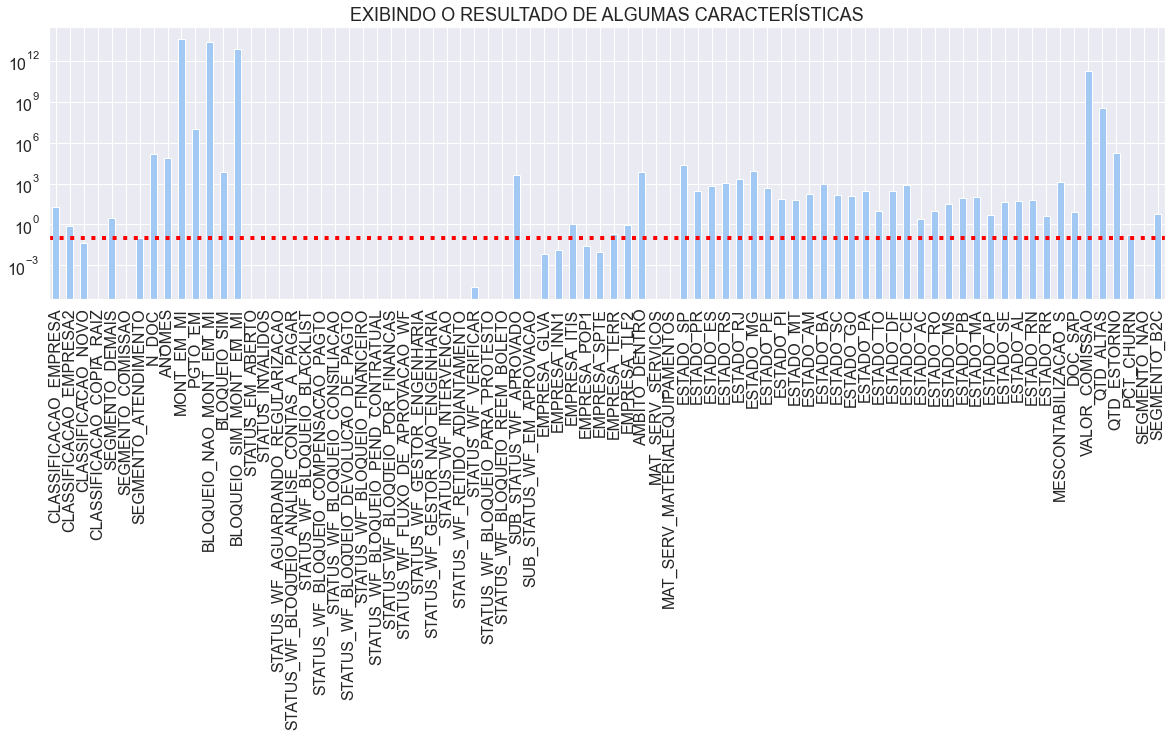

In [343]:
fig = plt.figure(figsize=(20, 5))

ax = pd.Series(selector.variances_, index=df_var.columns).iloc[0:80].plot(kind='bar', logy=True);
ax.axhline(vthreshold, ls='dotted', c='red', linewidth=4)

plt.xticks(rotation=90)
plt.title('EXIBINDO O RESULTADO DE ALGUMAS CARACTERÍSTICAS')
plt.show()

In [344]:
cols_support = list(df_var.columns[selector.get_support()])
cols_support

['CLASSIFICACAO_EMPRESA',
 'CLASSIFICACAO_EMPRESA2',
 'SEGMENTO_DEMAIS',
 'SEGMENTO_ATENDIMENTO',
 'N_DOC',
 'ANOMES',
 'MONT_EM_MI',
 'PGTO_EM',
 'BLOQUEIO_NAO_MONT_EM_MI',
 'BLOQUEIO_SIM',
 'BLOQUEIO_SIM_MONT_EM_MI',
 'SUB_STATUS_WF_APROVADO',
 'EMPRESA_ITIS',
 'EMPRESA_TERR',
 'EMPRESA_TLF2',
 'AMBITO_DENTRO',
 'ESTADO_SP',
 'ESTADO_PR',
 'ESTADO_ES',
 'ESTADO_RS',
 'ESTADO_RJ',
 'ESTADO_MG',
 'ESTADO_PE',
 'ESTADO_PI',
 'ESTADO_MT',
 'ESTADO_AM',
 'ESTADO_BA',
 'ESTADO_SC',
 'ESTADO_GO',
 'ESTADO_PA',
 'ESTADO_TO',
 'ESTADO_DF',
 'ESTADO_CE',
 'ESTADO_AC',
 'ESTADO_RO',
 'ESTADO_MS',
 'ESTADO_PB',
 'ESTADO_MA',
 'ESTADO_AP',
 'ESTADO_SE',
 'ESTADO_AL',
 'ESTADO_RN',
 'ESTADO_RR',
 'MESCONTABILIZACAO_S',
 'DOC_SAP',
 'VALOR_COMISSAO',
 'QTD_ALTAS',
 'QTD_ESTORNO',
 'PCT_CHURN',
 'SEGMENTO_B2C',
 'SEGMENTO_B2B',
 'CANAL_REVENDA',
 'CANAL_VAREJO',
 'CANAL_PAP',
 'CANAL_DISTRIBUIDOR',
 'TP_SERVICO_OUTROS',
 'TP_SERVICO_RENTABILIZACAO',
 'UF_SP',
 'UF_PR',
 'UF_BA',
 'UF_MG',
 'UF_MS',


In [345]:
full = full[['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA'] + cols_support].copy()
full.head(3)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,CLASSIFICACAO_EMPRESA,CLASSIFICACAO_EMPRESA2,SEGMENTO_DEMAIS,SEGMENTO_ATENDIMENTO,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,SUB_STATUS_WF_APROVADO,EMPRESA_ITIS,EMPRESA_TERR,EMPRESA_TLF2,AMBITO_DENTRO,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_S,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_REVENDA,CANAL_VAREJO,CANAL_PAP,CANAL_DISTRIBUIDOR,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_PA,UF_MT,UF_GO,UF_RJ,UF_SC,UF_ES,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,FATURADO_BRUTO,PERC_ARREC,CONTESTACAO,SALDO_EM_ABERTO,PERC_SALDO_EM_ABERTO,AJUSTE_MEDIO,HCS_SAP_GT,PERC_SERVICO,QDE_PROC_TRAB,ATIVA_FGTS,PARCELADA_FGTS,ATIVA_INSS,PARCELADA_INSS,INSS_TOTAL,TOTAL_GERAL,PENDENCIA_NAO_CONFORME,MONITORADO_NAO
0,00000000,BANCO DO BRASIL,2021-02-01,1,0,1,0,1,1,-3046.73,-1.0,-3046.73,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,959047.87,89.0,107497.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000000,BANCO DO BRASIL,2021-04-01,1,0,1,0,1,0,-488.88,-1.0,-488.88,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,948576.62,87.0,122331.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,00000000,BANCO DO BRASIL,2021-05-01,1,0,1,0,1,1,-1143.59,-1.0,-1143.59,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,738621.65,90.0,71978.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [346]:
full.shape

(71297, 96)

In [347]:
del df_var

### PRINCIPAL COMPONENTE ANALYSIS (PCA):

In [348]:
from sklearn.decomposition import PCA

In [349]:
df_pca = full.set_index(['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA']).copy()
df_pca.head(3)

CLASSIFICACAO_EMPRESA  CLASSIFICACAO_EMPRESA2  SEGMENTO_DEMAIS  SEGMENTO_ATENDIMENTO  N_DOC  ANOMES  MONT_EM_MI  PGTO_EM  BLOQUEIO_NAO_MONT_EM_MI  BLOQUEIO_SIM  BLOQUEIO_SIM_MONT_EM_MI  SUB_STATUS_WF_APROVADO  EMPRESA_ITIS  EMPRESA_TERR  EMPRESA_TLF2  AMBITO_DENTRO  ESTADO_SP  ESTADO_PR  ESTADO_ES  ESTADO_RS  ESTADO_RJ  ESTADO_MG  ESTADO_PE  ESTADO_PI  ESTADO_MT  ESTADO_AM  ESTADO_BA  ESTADO_SC  ESTADO_GO  ESTADO_PA  ESTADO_TO  ESTADO_DF  ESTADO_CE  ESTADO_AC  ESTADO_RO  ESTADO_MS  ESTADO_PB  ESTADO_MA  ESTADO_AP  ESTADO_SE  ESTADO_AL  ESTADO_RN  ESTADO_RR  MESCONTABILIZACAO_S  DOC_SAP  VALOR_COMISSAO  QTD_ALTAS  QTD_ESTORNO  PCT_CHURN  SEGMENTO_B2C  SEGMENTO_B2B  CANAL_REVENDA  CANAL_VAREJO  CANAL_PAP  CANAL_DISTRIBUIDOR  TP_SERVICO_OUTROS  TP_SERVICO_RENTABILIZACAO  UF_SP  UF_PR  UF_BA  UF_MG  UF_MS  UF_PE  UF_RS  UF_PA  UF_MT  UF_GO  UF_RJ  UF_SC  UF_ES  PLATAFORMA_OUTROS  PLATAFORMA_FIXA  CLASSE_AMARELO  CLASSE_VERDE  CLASSE_VERMELHO  \
RAIZ_CNPJ NOME_RESUMO     COMPETENCIA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
00000000  BANCO DO BRASIL 2021-02-01                       1                       0                1                     0      1       1    -3046.73     -1.0                 -3046.73             0                      0.0                       0             1             0             0              0          1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0                    0      0.0             0.0        0.0          0.0        0.0           0.0           0.0            0.0           0.0        0.0                 0.0                0.0                        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                0.0              0.0             0.0           0.0              0.0   
                          2021-04-01                       1                       0                1                     0      1       0     -488.88     -1.0                  -488.88             0                      0.0                       0             1             0             0              0          1          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0                    0      0.0             0.0        0.0          0.0        0.0           0.0           0.0            0.0           0.0        0.0                 0.0                0.0                        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                0.0              0.0             0.0           0.0              0.0   
                          2021-05-01                       1   

In [350]:
names = df_pca.columns
indexes = df_pca.index
#sc = preprocessing.StandardScaler()
sc = preprocessing.MinMaxScaler((0, 1))

df_pca = sc.fit_transform(df_pca)
df_pca_scaled = pd.DataFrame(df_pca, columns=names, index=indexes)
df_pca_scaled.head(3)

CLASSIFICACAO_EMPRESA  CLASSIFICACAO_EMPRESA2  SEGMENTO_DEMAIS  SEGMENTO_ATENDIMENTO  N_DOC    ANOMES  MONT_EM_MI   PGTO_EM  BLOQUEIO_NAO_MONT_EM_MI  BLOQUEIO_SIM  BLOQUEIO_SIM_MONT_EM_MI  SUB_STATUS_WF_APROVADO  EMPRESA_ITIS  EMPRESA_TERR  EMPRESA_TLF2  AMBITO_DENTRO  ESTADO_SP  ESTADO_PR  ESTADO_ES  ESTADO_RS  ESTADO_RJ  ESTADO_MG  ESTADO_PE  ESTADO_PI  ESTADO_MT  ESTADO_AM  ESTADO_BA  ESTADO_SC  ESTADO_GO  ESTADO_PA  ESTADO_TO  ESTADO_DF  ESTADO_CE  ESTADO_AC  ESTADO_RO  ESTADO_MS  ESTADO_PB  ESTADO_MA  ESTADO_AP  ESTADO_SE  ESTADO_AL  ESTADO_RN  ESTADO_RR  MESCONTABILIZACAO_S  DOC_SAP  VALOR_COMISSAO  QTD_ALTAS  QTD_ESTORNO  PCT_CHURN  SEGMENTO_B2C  SEGMENTO_B2B  CANAL_REVENDA  CANAL_VAREJO  CANAL_PAP  CANAL_DISTRIBUIDOR  TP_SERVICO_OUTROS  TP_SERVICO_RENTABILIZACAO  UF_SP  UF_PR  UF_BA  UF_MG  UF_MS  UF_PE  UF_RS  UF_PA  UF_MT  UF_GO  UF_RJ  UF_SC  UF_ES  PLATAFORMA_OUTROS  PLATAFORMA_FIXA  CLASSE_AMARELO  CLASSE_VERDE  CLASSE_VERMELHO  \
RAIZ_CNPJ NOME_RESUMO     COMPETENCIA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
00000000  BANCO DO BRASIL 2021-02-01                0.004975                     0.0         0.015625                   0.0    0.0  0.000017    0.994718  0.249034                 0.994718           0.0                 0.997094                     0.0      0.007407           0.0           0.0            0.0   0.000075        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0                  0.0      0.0        0.043063        0.0     0.000149        0.0           0.0           0.0            0.0           0.0        0.0                 0.0                0.0                        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                0.0              0.0             0.0           0.0              0.0   
                          2021-04-01                0.004975                     0.0         0.015625                   0.0    0.0  0.000000    0.994724  0.249034                 0.994724           0.0                 0.997094                     0.0      0.007407           0.0           0.0            0.0   0.000075        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0                  0.0      0.0        0.043063        0.0     0.000149        0.0           0.0           0.0            0.0           0.0        0.0                 0.0                0.0                        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0                0.0              0.0             0.0           0.0              0.0   
                          2021-05-01               

In [351]:
model = PCA()
principalComponents = model.fit_transform(df_pca_scaled)

In [352]:
n = len(model.explained_variance_ratio_)
print(model.explained_variance_ratio_)

[5.52439248e-01 2.83351109e-01 3.73772707e-02 2.38935912e-02
 1.13331093e-02 1.12023267e-02 8.51258906e-03 6.60950682e-03
 5.95129865e-03 4.83481102e-03 4.34939978e-03 4.28494611e-03
 3.88866175e-03 3.74710835e-03 3.26814956e-03 3.06219403e-03
 2.71789198e-03 2.45220090e-03 2.38177416e-03 2.31022131e-03
 2.05119518e-03 1.55085991e-03 1.44267222e-03 1.36155877e-03
 1.25378643e-03 1.19060414e-03 1.11425873e-03 9.87739170e-04
 7.01232162e-04 5.33077744e-04 4.96565187e-04 4.66914116e-04
 4.55892786e-04 4.20323871e-04 4.19435685e-04 4.00489408e-04
 3.66459106e-04 3.63649999e-04 3.39588818e-04 3.16374261e-04
 3.03145808e-04 2.96421043e-04 2.88129150e-04 2.82339701e-04
 2.76569612e-04 2.65601513e-04 2.44780383e-04 2.34005104e-04
 2.23389410e-04 2.13139697e-04 1.97957819e-04 1.86355654e-04
 1.62931498e-04 1.53156104e-04 1.50017098e-04 1.43296926e-04
 1.38600487e-04 1.30006350e-04 1.25578757e-04 1.21670179e-04
 1.19179752e-04 1.16874223e-04 1.09693211e-04 1.08916788e-04
 9.66661513e-05 9.380377

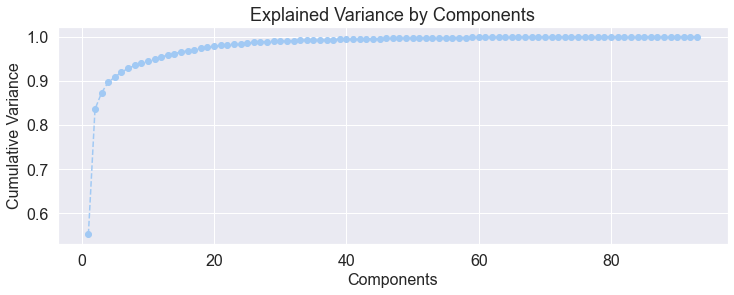

In [353]:
plt.figure(figsize=(12, 4))

plt.plot(range(1, n+1), model.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Components')
plt.ylabel('Cumulative Variance')
plt.show()

#### Em geral, utiliza-se um número de componentes que preserve cerca de 80% da variância. Neste caso, poderíamos escolher 5 ou 6 componentes por exemplo.

In [354]:
model = PCA(n_components=5)
principalComponents = model.fit_transform(df_pca_scaled)

In [355]:
cols = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5']

df_pca = pd.DataFrame(data = principalComponents, columns = cols, index=df_pca_scaled.index)
df_pca = df_pca.reset_index(drop=False)
df_pca.head(3)

,RAIZ_CNPJ,NOME_RESUMO,COMPETENCIA,pca1,pca2,pca3,pca4,pca5
0,00000000,BANCO DO BRASIL,2021-02-01,0.341681,-0.307184,-0.583986,-0.069288,-0.032345
1,00000000,BANCO DO BRASIL,2021-04-01,0.663872,0.634371,-0.552083,-0.140196,0.018105
2,00000000,BANCO DO BRASIL,2021-05-01,0.684640,0.627272,-0.571510,-0.141855,0.017008


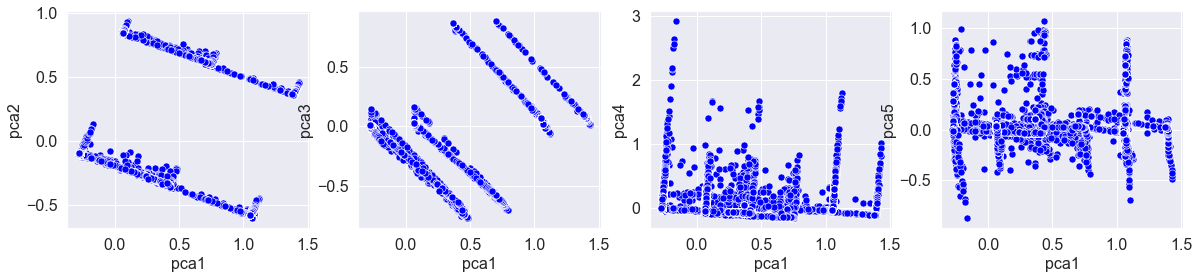

In [356]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.scatterplot(data=df_pca, x='pca1', y='pca2', s = 50, color = 'blue', ax=ax1)
sns.scatterplot(data=df_pca, x='pca1', y='pca3', s = 50, color = 'blue', ax=ax2)
sns.scatterplot(data=df_pca, x='pca1', y='pca4', s = 50, color = 'blue', ax=ax3)
sns.scatterplot(data=df_pca, x='pca1', y='pca5', s = 50, color = 'blue', ax=ax4)

plt.show()

### CLUSTERING COM K-Means:

In [357]:
from sklearn.cluster import KMeans

In [361]:
df_pca = df_pca.set_index(['RAIZ_CNPJ', 'NOME_RESUMO', 'COMPETENCIA']).copy()
df_pca.head(3)

pca1      pca2      pca3      pca4      pca5
RAIZ_CNPJ NOME_RESUMO     COMPETENCIA                                                  
00000000  BANCO DO BRASIL 2021-02-01   0.341681 -0.307184 -0.583986 -0.069288 -0.032345
                          2021-04-01   0.663872  0.634371 -0.552083 -0.140196  0.018105
                          2021-05-01   0.684640  0.627272 -0.571510 -0.141855  0.017008

In [362]:
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)


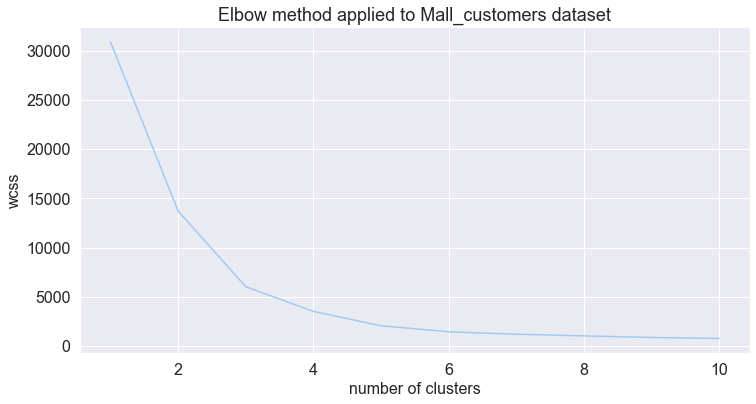

In [363]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow method applied to Mall_customers dataset")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

#### Essa abordagem consiste em procurar um "cotovelo" no gráfico. Normalmente, a parte do gráfico antes do cotovelo estaria em declínio acentuado e depois dele mais suave. No nosso caso, por volta de 3 clusters.

In [364]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, init = 'k-means++', n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(df_pca)

In [365]:
df_pca['cluster'] = clusters
df_pca['cluster'] = df_pca['cluster'].map({0:'C1', 1:'C2', 2:'C3'})
df_pca['cluster'].value_counts(ascending=False)

C1    51914
C2    10097
C3     9286
Name: cluster, dtype: int64

#### Análise do primeiro componente com os demais e os clusters:

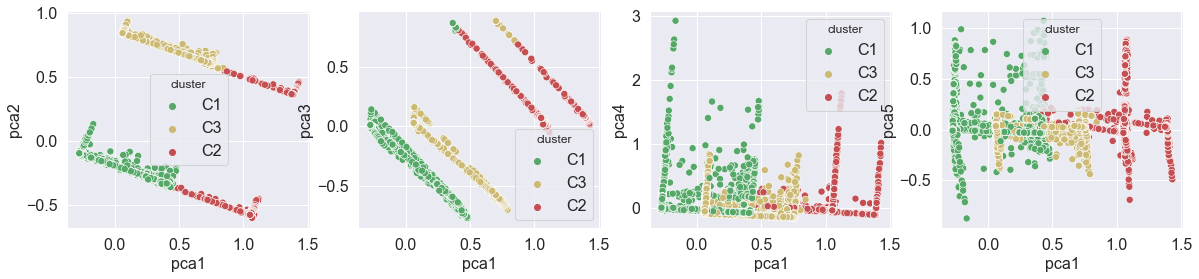

In [366]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.scatterplot(data=df_pca, x='pca1', y='pca2', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax1)
sns.scatterplot(data=df_pca, x='pca1', y='pca3', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax2)
sns.scatterplot(data=df_pca, x='pca1', y='pca4', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax3)
sns.scatterplot(data=df_pca, x='pca1', y='pca5', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax4)

plt.show()

#### Análise do segundo componente com os demais e os clusters:

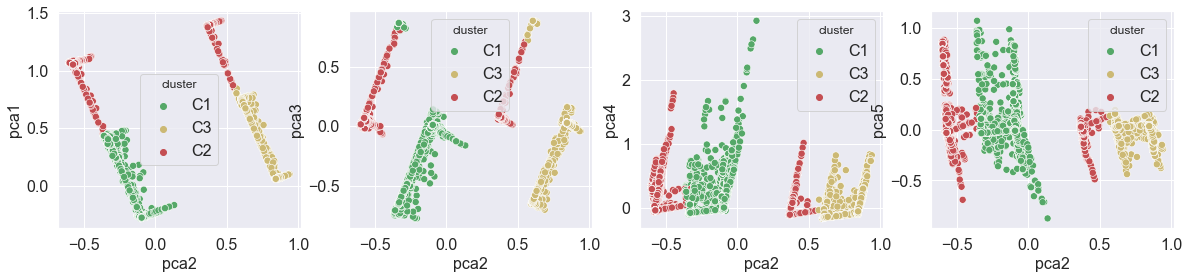

In [367]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.scatterplot(data=df_pca, x='pca2', y='pca1', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax1)
sns.scatterplot(data=df_pca, x='pca2', y='pca3', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax2)
sns.scatterplot(data=df_pca, x='pca2', y='pca4', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax3)
sns.scatterplot(data=df_pca, x='pca2', y='pca5', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax4)

plt.show()

#### Análise do terceiro componente com os demais e os clusters:

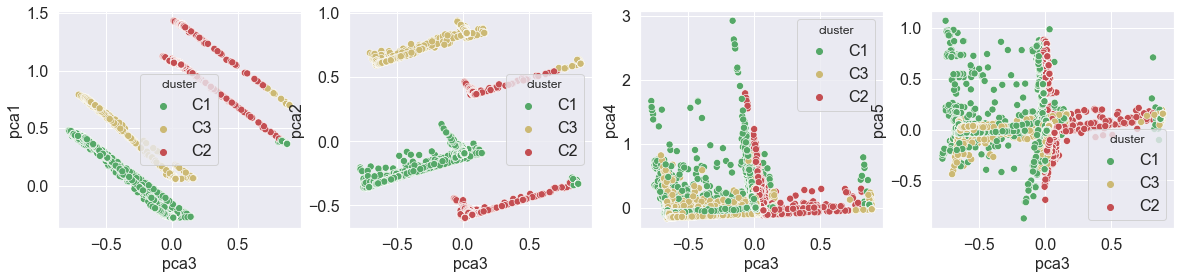

In [368]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.scatterplot(data=df_pca, x='pca3', y='pca1', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax1)
sns.scatterplot(data=df_pca, x='pca3', y='pca2', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax2)
sns.scatterplot(data=df_pca, x='pca3', y='pca4', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax3)
sns.scatterplot(data=df_pca, x='pca3', y='pca5', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax4)

plt.show()

#### Análise do quarto componente com os demais e os clusters:

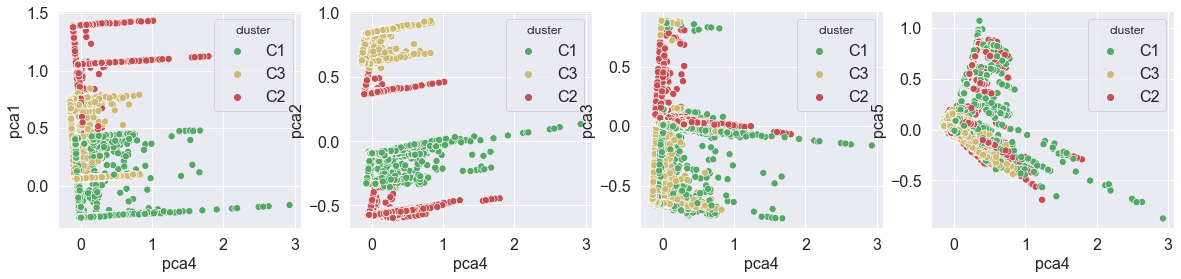

In [369]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.scatterplot(data=df_pca, x='pca4', y='pca1', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax1)
sns.scatterplot(data=df_pca, x='pca4', y='pca2', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax2)
sns.scatterplot(data=df_pca, x='pca4', y='pca3', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax3)
sns.scatterplot(data=df_pca, x='pca4', y='pca5', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax4)

plt.show()

#### Análise do quinto componente com os demais e os clusters:

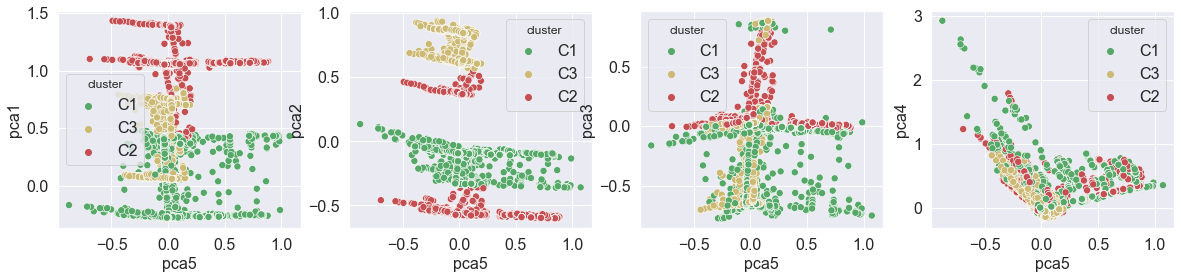

In [370]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

sns.scatterplot(data=df_pca, x='pca5', y='pca1', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax1)
sns.scatterplot(data=df_pca, x='pca5', y='pca2', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax2)
sns.scatterplot(data=df_pca, x='pca5', y='pca3', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax3)
sns.scatterplot(data=df_pca, x='pca5', y='pca4', s = 50, hue='cluster', palette=['g', 'y', 'r'], ax=ax4)

plt.show()